In [18]:
import sys
sys.path.append('../')
import numpy as np
import importlib
import dataloader as u
import matplotlib.pyplot as plt
import subprocess

In [13]:
datadict = u.load_covid_timeseries(smoothing=3, cases_cutoff=5)
cases = datadict['cases_raw']
deaths = datadict['deaths_raw']

In [36]:
county = 1868
z = deaths[county] 
z = z[z != 0]
init = [z[0]]
z1 = np.diff(z)
init.append(z1[0])
z2 = np.diff(z1)
print(z)

[  21.   40.   60.   92.  124.  149.  216.  253.  305.  376.  447.  499.
  590.  685.  813.  948. 1129. 1344. 1400. 1759. 1848. 2116. 2116. 2948.
 3208. 3358. 3426. 3466. 3878. 4026. 4204. 4345. 4463. 4571. 4723. 4800.
 4870. 4983. 5070. 5150. 5204. 5279. 5385. 5433. 5460. 5609. 5671. 5717.
 5777. 5791. 5820. 5851. 5878. 5896.]


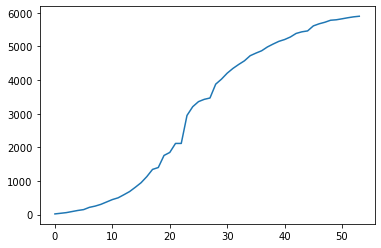

In [38]:
y = z
x = np.arange(0, y.shape[0])
plt.plot(x, y)

In [39]:
series = z
validation_steps = 10

m = series.shape[0] - validation_steps
x = np.arange(0, m)
n = 1

with open('deaths.in', 'w+') as file:
    file.write(f'{m}\t{n}\n')
    for i in range(m):
        file.write(f'{series[i]}\t{x[i]}\n')

In [56]:
result = subprocess.check_output(['../main', '-t', 'deaths.in', '-f', '12'])

In [57]:
print(result.decode('utf-8'))

Complete Command-line Arguments:../main -t deaths.in -f 12 
Train File: deaths.in
Fraction's Depth: 12
Number of valid inputs: 44, Number of variables: 1
Data Separating into Train-Test: 75-25 split
Train data:: Number of Samples: 33, Number of Variables: 1
Test data:: Number of Samples: 11, Number of Variables: 1
BestFitness	 1.3976e+005	MSE_Train	1.3976e+005	NMSE_Train	0
MSE_Test	1.3869e+005	NMSE_Test	0.02597	Solution_Size	0
${-699.02}+\cfrac{{726.51}}{{429.14}+\cfrac{{-2709}}{{14238}+\cfrac{{418.61}}{{-3131.9}+\cfrac{{-4456}}{{-2073.2}+\cfrac{{-615.7}}{{-3823.7}+\cfrac{{-1428.2}}{{-633.04}+\cfrac{{-281.86}}{{-2359.6}+\cfrac{{-660.19}}{{72.326}+\cfrac{{285.56}}{{710.63}+\cfrac{{872.74}}{{979.82}+\cfrac{{1280.3}}{{2386.5}+\cfrac{{2474.5}}{{1677.8}}}}}}}}}}}}}$
(-699.02)+(726.51)/((429.14)+(-2709)/((14238)+(418.61)/((-3131.9)+(-4456)/((-2073.2)+(-615.7)/((-3823.7)+(-1428.2)/((-633.04)+(-281.86)/((-2359.6)+(-660.19)/((72.326)+(285.56)/((710.63)+(872.74)/((979.82)+(1280.3)/((2386.5)+(247

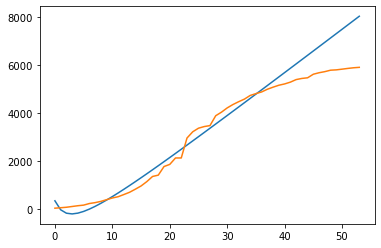

In [58]:
B2 = np.arange(series.shape[0])
y = (-1791.4+183.25*B2)+(-1795.6)/((10.502+1.1594*B2)+(-700.39-90.209*B2)/((61.49)+(-83.366)/((-481.32)+(3219.2)/((29.25)+(124.01+20.813*B2)/((-628.87)+(39.384)/((-107.49)+(-1003.4)/((382.97+104.02*B2)+(748.14+12.341*B2)/((88.699)))))))))

plt.plot(B2, y)

y = z
x = np.arange(0, y.shape[0])
plt.plot(x, y)